In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Data Import and Exploratory analysis

In [4]:
df=pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


There are no missing data in the training dataset. As we have many features it is possible that some might be correlated. Let us check correlation between features.

Text(0.5, 1, 'Correlation ')

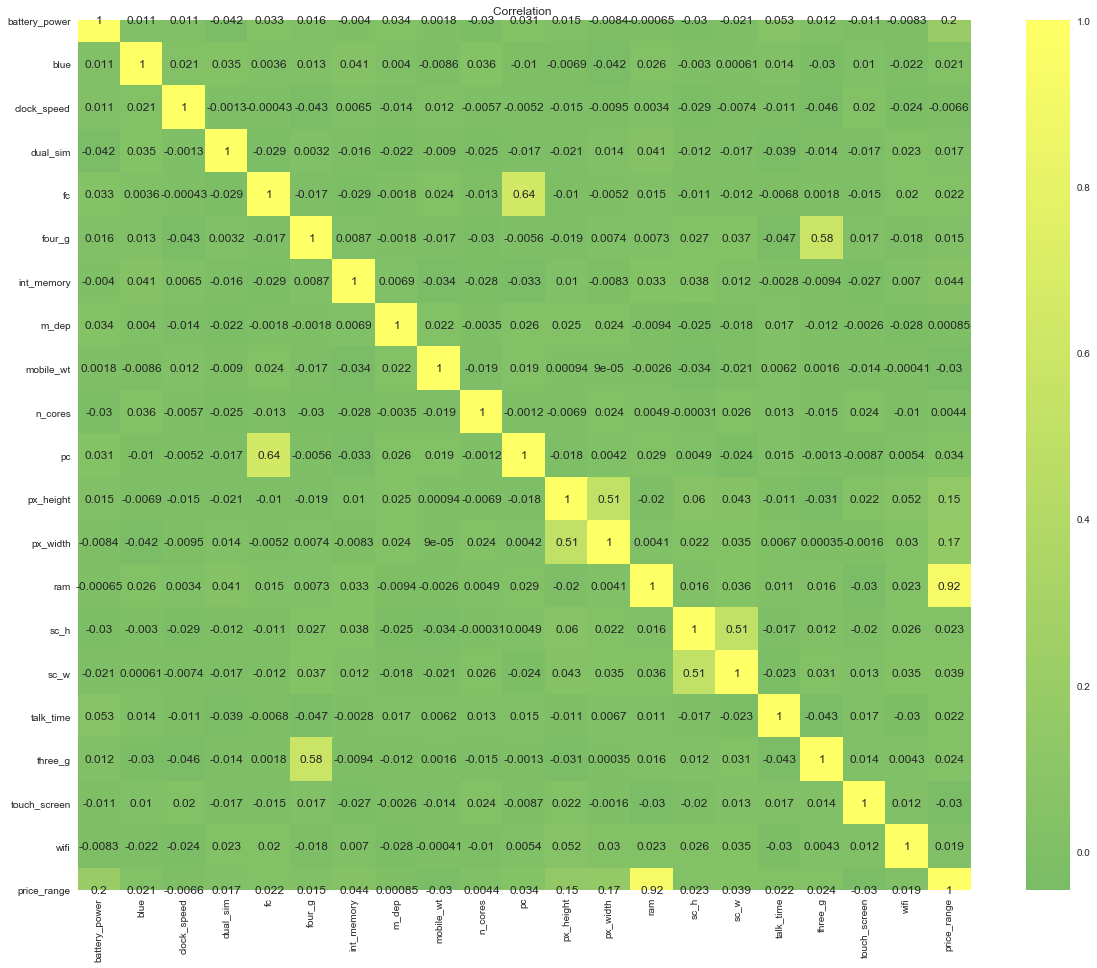

In [52]:
corr=df.corr()
fig = plt.figure(figsize=(20,16))
corr_plot = sns.heatmap(corr, cmap='summer',annot=True,center=0)
corr_plot.set_title("Correlation ")

We see a srong correlaion between the price range and Ram.There is also a correlation between :
    
    * 3G and 4G
    * pc and fc
    * px_height and px_width
    * SC_height and sc_width


In [46]:
'''Defining the features and the target from Training dataset and splitting into train and test data'''
y = df["price_range"].values
X = df.drop(["price_range"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

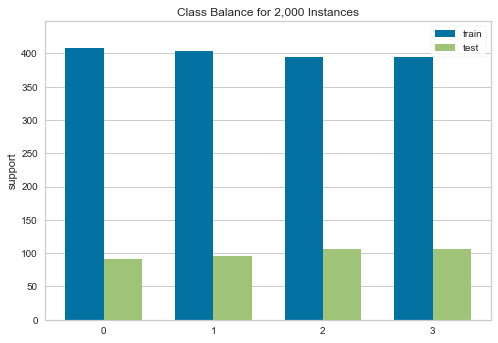

In [47]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [48]:
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.95375
test accuracy: 0.9425


# Hyperparameter Tuning 

Let us use GridsearchCV to find the best parameters for our SVM Model and apply them to see if the accuracy of our model becomes better.

In [39]:
param_grid=dict(kernel=["linear", "rbf"],
                C=[1,0.1,0.25,0.5,2,0.75], gamma=["auto",0.01,0.001,0.0001,1]
               )

svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=param_grid)
grid_svm.fit(X_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.971875
best param:  {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}


In [42]:
#implement the best Parameters in our SVM
svm=SVC(C=0.1, gamma= 'auto', kernel= 'linear',random_state=1)
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.989375
test accuracy: 0.975


The accuracy improves after Tuning the Parameters which is what we wanted